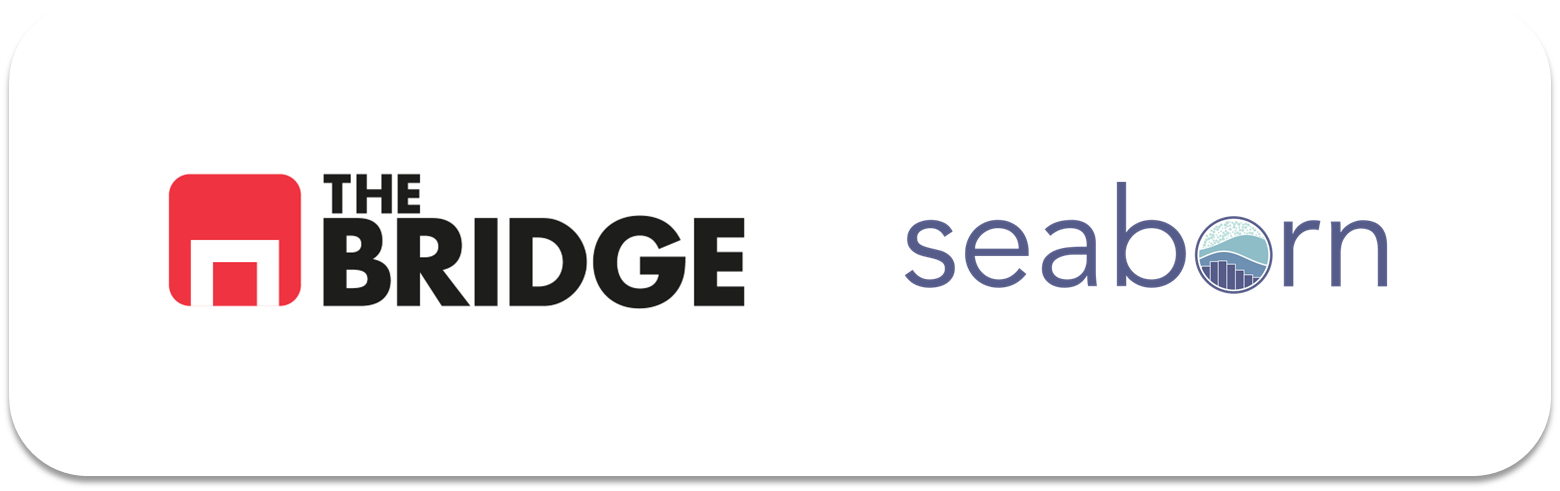

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [27]:
# cargamos los datos a nuestra liezo de trabajo

df_california = pd.read_csv("./data/california_cities.csv")
df_california.head(5) # chequeamos que esté bien cargado



,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [29]:
df_california = df_california.drop(columns=["Unnamed: 0"]) # eliminamos la columna Unnamed : 0 ya que  o nos aporta nada.
df_california.columns 

Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [30]:


def compara_multi_avanzada(df, col_num_1, col_num_2, col_cat=None, size='auto', escala=1, usar_colorbar=False):
    """
    Función para crear un diagrama de dispersión personalizado.

    Parámetros:
    1. df: DataFrame con los datos.
    2. col_num_1: Columna numérica para el eje X.
    3. col_num_2: Columna numérica para el eje Y.
    4. col_cat: Columna categórica para el color (opcional) . Ponemos None para que sea opcional de tal modo que si no hay valor no de error . Ahí entra "None"
    5. size: Puede ser un valor fijo (int o float) o una columna del DataFrame.
    6. escala: Factor para escalar el tamaño si 'size' es una columna.
    EXTRA. usar_colorbar: Booleano, si True muestra colorbar y no leyenda de colores.
    """

    plt.figure(figsize=(10, 7))

    # Determinar tamaño de los puntos
    if isinstance(size, str): # usamos instance para comprobar si es una cadena
        if size in df.columns: 
            tamanios = df[size] * escala 
        elif size == 'auto':
            tamanios = 50  # tamaño por defecto si es 'auto'
        else:
            raise ValueError(f"La columna '{size}' no existe en el DataFrame.")
    else:
        tamanios = size  # valor fijo

    # Crear scatterplot
    scatter = sns.scatterplot( # usamos sns para crear el scatterplot
        data=df,# establecemos los argumentos de entrada
        x=col_num_1,
        y=col_num_2,
        hue=col_cat if col_cat else None, # si col_cat es None no se usa-
        size=tamanios if isinstance(tamanios, pd.Series) else None, 
        sizes=(20, 300) if isinstance(tamanios, pd.Series) else None,
        palette='viridis' if usar_colorbar and col_cat else None,
        alpha=0.7,
        legend=False if usar_colorbar else 'full' 
    )

    # Título automático
    titulo = f'Diagrama de Dispersión: {col_num_1} vs {col_num_2}'
    if col_cat:
        titulo += f' (Color por {col_cat})'
    if isinstance(tamanios, pd.Series):
        titulo += f' | Tamaño por {size} * {escala}'
    plt.title(titulo, fontsize=13)

    # Etiquetas
    plt.xlabel(col_num_1)
    plt.ylabel(col_num_2)

    # Añadir colorbar si se especifica
    if usar_colorbar and col_cat:
        norm = plt.Normalize(df[col_cat].astype('category').cat.codes)
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])
        plt.colorbar(sm, label=col_cat)

    # Mostrar leyenda de tamaños si corresponde
    if isinstance(tamanios, pd.Series):
        plt.legend(title=col_cat if col_cat else "Categoría")

    plt.tight_layout()
    plt.show()


### 1.3
Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

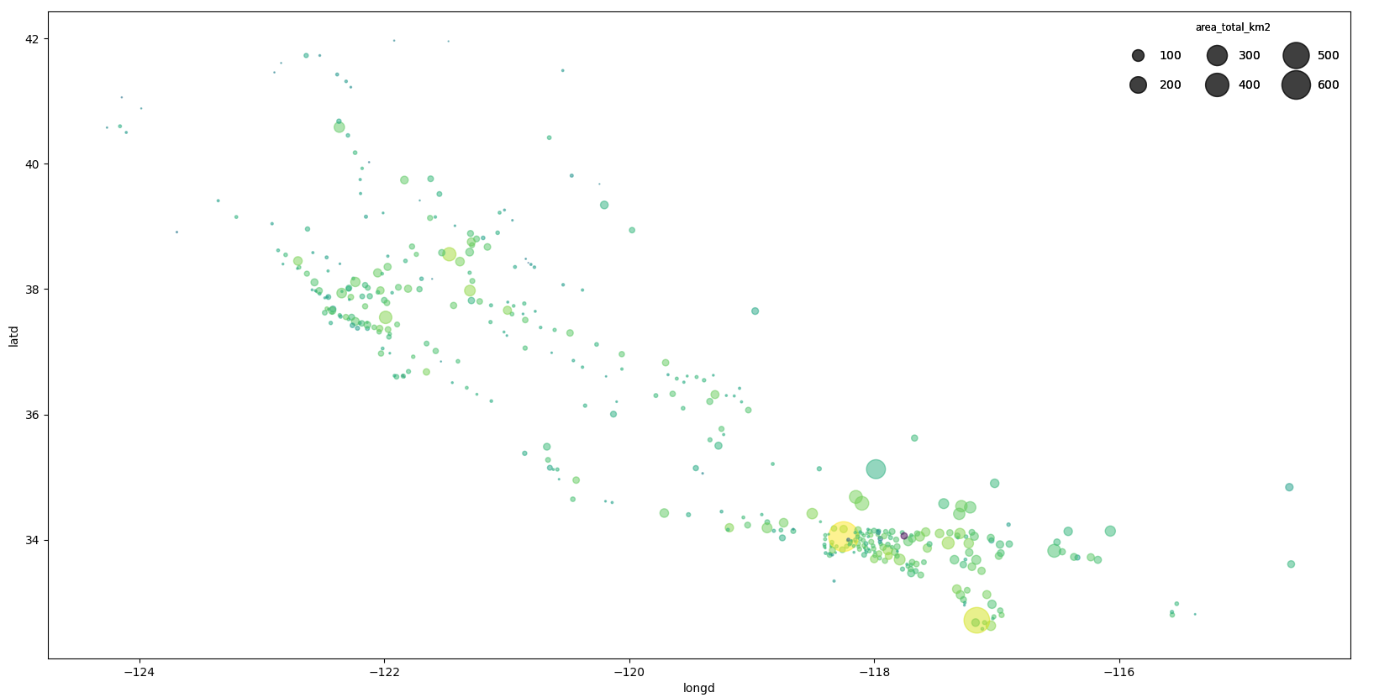

In [31]:
df_california.columns

Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

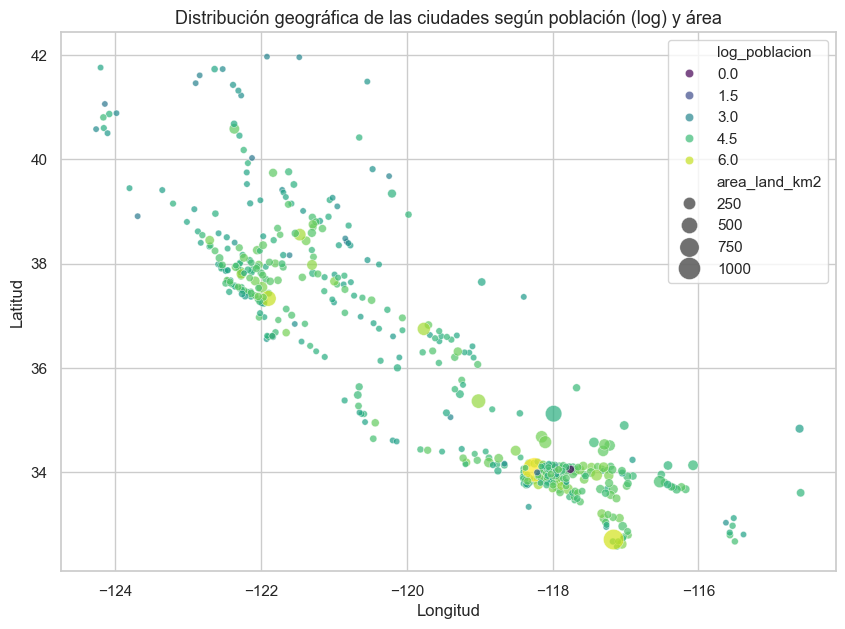

In [32]:


# Asegurar que log_poblacion esté correctamente creada (por si aún no lo hiciste)
df_california['log_poblacion'] = np.log10(df_california['population_total'])

# Crear scatterplot con latitud, longitud, tamaño por área y color por población (log)
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=df_california,
    x='longd',                  # Longitud
    y='latd',                   # Latitud
    size='area_land_km2',       # Tamaño del punto según superficie
    sizes=(20, 300),
    hue='log_poblacion',        # Color por población en escala logarítmica
    palette='viridis',
    alpha=0.7,
    legend='brief'
)

# Títulos y etiquetas
plt.title("Distribución geográfica de las ciudades según población (log) y área", fontsize=13)
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Agregar colorbar para la población logarítmica
norm = plt.Normalize(df_california['log_poblacion'].min(), df_california['log_poblacion'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Log₁₀ de la población total')

plt.tight_layout()
plt.show()


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [87]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head() #chequeamos que esté bien cargado en nuestro lienzo de trabajo.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1º EL TITANIC FUE UN ACCIDENTE CON UNA TASA DE MORTALIDAD ALTA

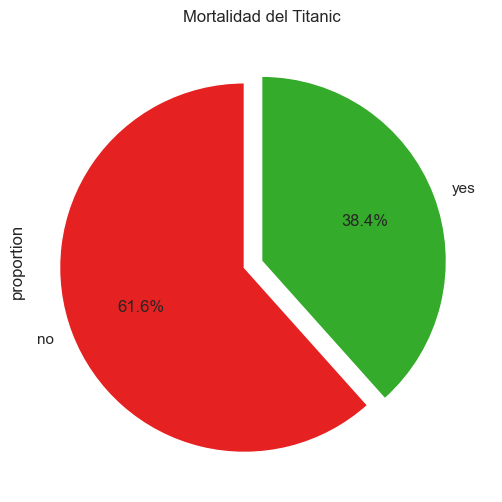

In [88]:
df_titanic["alive"].value_counts(normalize = True) # miramos la mortalidad del titanic donde vemos que alrededor del 60 % de las personas fallecieron en el accidente.
# hacemos una gráfica para presentar la mortalidad del titanic de una forma más visual en forma de tarta.
plt.figure(figsize=(8,6))
df_titanic["alive"].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',  # Formato del porcentaje
    startangle=90,      # Ángulo de inicio
    colors=["#e62121","#35ab2b"],  # Colores personalizados
    explode=(0.1, 0),   # Explosión del primer segmento
    # creamos el titulo del gráfico
    title = "Mortalidad del Titanic"
);

In [89]:
df_titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

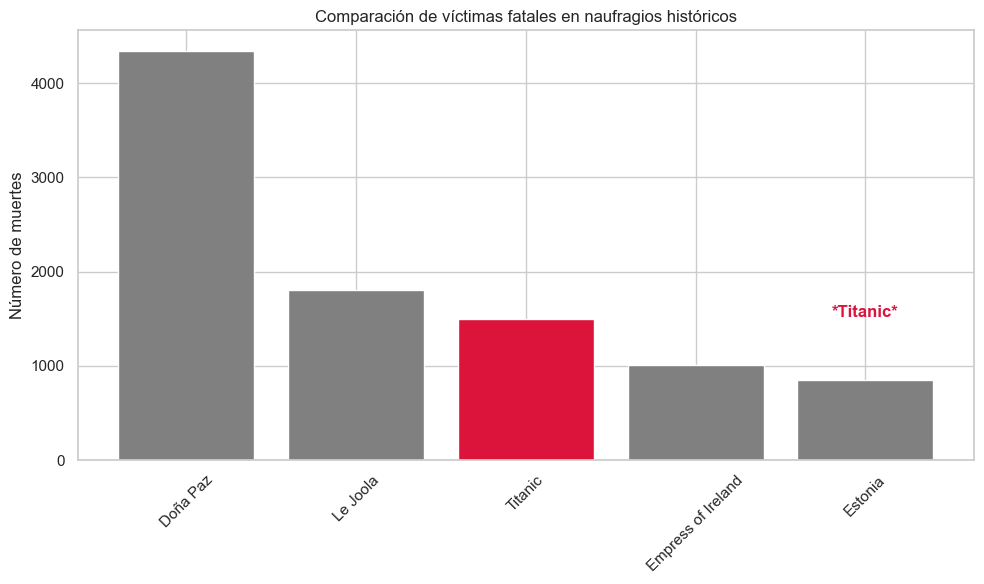

In [90]:

# Datos simplificados para hacer la comparativa de naufragios .
datos = pd.DataFrame({
    'Naufragio': ['Doña Paz', 'Le Joola', 'Estonia', 'Empress of Ireland', 'Titanic'],
    'Muertes': [4341, 1800, 852, 1012, 1500],
})

# Ordenar por muertes y verlos de mayor a menor numero de muertes
datos = datos.sort_values(by='Muertes', ascending=False)

# Color especial para Titanic para resaltarlo sobre el resto
colors = ['grey' if name != 'Titanic' else 'crimson' for name in datos['Naufragio']]

plt.figure(figsize=(10,6))
plt.bar(datos['Naufragio'], datos['Muertes'], color=colors)
plt.title("Comparación de víctimas fatales en naufragios históricos")
plt.ylabel("Número de muertes")
plt.xticks(rotation=45)
plt.text(4, 1520, "*Titanic*", color='crimson', ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show();


### 2º LAS MUJERES Y LOS NIÑOS PRIMERO PERO...

In [91]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
df_titanic["age"].describe() # hay un problema. La columna age tiene valores NaN. Vamos a ver cuántos hay y qué hacer con ellos.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [93]:

# Calculamos la media de edad por cada who
df_titanic.groupby ("who")["age"].mean().round(0)
# Creamos una función para rellenar los NaN de la columna age con la media por cada who
def rellenar_nan_por_who(df):
    """
    Rellena los valores NaN de la columna 'age' con la media por grupo 'who'.
    """
    for who, group in df.groupby('who'):
        media_edad = group['age'].mean()
        df.loc[(df['who'] == who) & (df['age'].isna()), 'age'] = media_edad
    return df

In [94]:
# Aplicamos la función al dataframe para sustituir los NaN por la media de cada grupo.
rellenar_nan_por_who(df_titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,32.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [95]:
# contamos el numero de valores NaN en la coulumna age
df_titanic["age"].isna().sum()


np.int64(0)

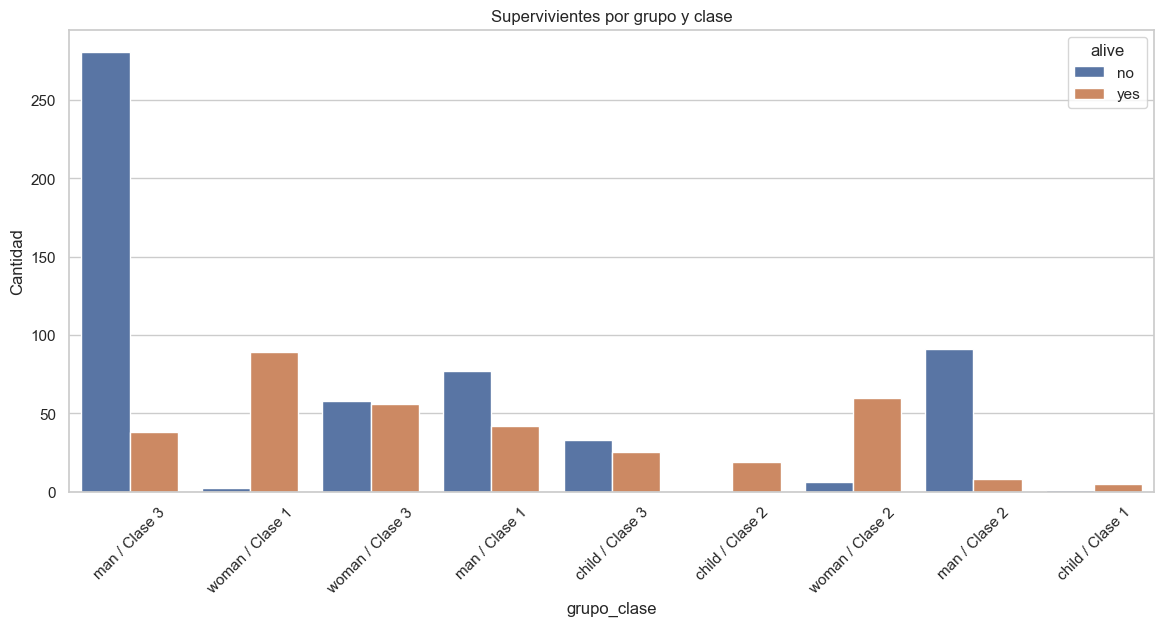

In [113]:
# Queremos saber cuantos el numero de supervivientes y fallecidos de cada grupo "who"
df_titanic.groupby("who")["alive"].value_counts(normalize=True) * 100

#creamos una gráfica para visualizar estos datos facilmente. Añadimos la pclass a la gráfica para saber si fue un factor determinante a la hora de aplicar la política .
df_titanic["grupo_clase"] = df_titanic["who"] + " / Clase " + df_titanic["pclass"].astype(str)

plt.figure(figsize=(14, 6))
sns.countplot(data=df_titanic, x="grupo_clase", hue="alive")
plt.title("Supervivientes por grupo y clase")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()


- Es cierto que se aplicó la politica de mujeres y niños primero , pero también es cierto que los hombres también se salvaron. Llegan a aplicar la política de manera estricta , deberíamos ver menos hombres supervivientes y más niños y mujeres dentro de los supervivientes. Añadir que se puede apreciar como los hombres de clases más altas tenían más probabilidades de sobrevivir.

### 3º ¿TUVO QUE VER LA CLASE DEL BILLETE CON LA MORTALIDAD DEL TITANIC?

In [106]:
# vamos a ver si hay alguna relación entre la clase del billete y la superviviencia.
df_titanic.groupby("pclass")["alive"].value_counts(normalize = True) * 100

pclass  alive
1       yes      62.962963
        no       37.037037
2       no       52.717391
        yes      47.282609
3       no       75.763747
        yes      24.236253
Name: proportion, dtype: float64

<Axes: xlabel='pclass', ylabel='count'>

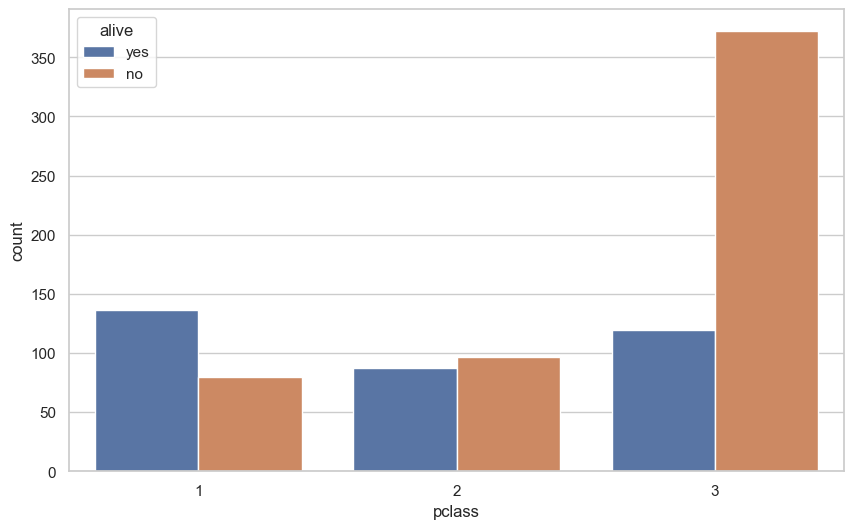

In [ ]:
# Queremos mostrar los datos gráficamente para una mejor comprensión.
plt.figure(figsize = (10,6))
sns.countplot(data = df_titanic, x = "pclass", hue = "alive")

* La relación entre la clase del billete y la supervivencia es clara: los pasajeros de primera clase tuvieron una tasa de superviviencia significativamente más alta que los de tercera clase.

In [114]:
### 4º Diferencia en la superviviencia entre mujeres y niños.

# Para ello tenemos una columna llamada "who" que nos dice si es hombre, mujer o niño.
df_titanic.groupby("who")["alive"].value_counts()

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

In [120]:
# calculamos la tasa de supervivencia  en porcentaje teniendo en cuenta el total de cada grupo.
df_titanic.groupby("who")["alive"].value_counts(normalize=True) * 100

who    alive
child  yes      59.036145
       no       40.963855
man    no       83.612663
       yes      16.387337
woman  yes      75.645756
       no       24.354244
Name: proportion, dtype: float64

In [128]:
df_titanic_niños = df_titanic[df_titanic["who"] =="child"]

df_titanic_mujeres = df_titanic[df_titanic["who"] == "woman"]

df_titanic_mujeres_niños = pd.concat([df_titanic_niños, df_titanic_mujeres])

df_titanic_mujeres_niños

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,grupo_clase
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child / Clase 3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,child / Clase 2
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,child / Clase 3
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True,child / Clase 3
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,child / Clase 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,woman / Clase 2
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True,woman / Clase 3
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,woman / Clase 3
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,woman / Clase 1


<Axes: xlabel='who', ylabel='count'>

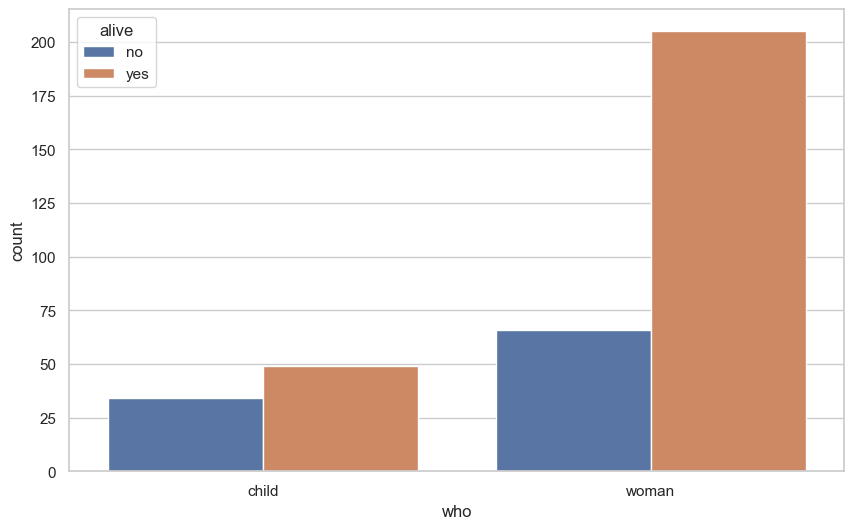

In [129]:
# queremos ver graficamente la diferencia de tasa de supervivencia en % entre mujeres y niños.

plt.figure(figsize = (10,6))
sns.countplot(data = df_titanic_mujeres_niños, x = "who", hue = "alive")

In [131]:
df_titanic_mujeres_niños.groupby("who")["alive"].value_counts(normalize = True) * 100

who    alive
child  yes      59.036145
       no       40.963855
woman  yes      75.645756
       no       24.354244
Name: proportion, dtype: float64

* Vemos que la tasa de supervivencia entre mujeres y niños es muy alta, por lo que podemos concluir que se las mujeres tuvieron prioridad a la hora de ser rescatadas antes que los niños. La diferencia en numeros es notable, el 59% de los niños sobrevivieron frente al 75% de las mujeres. Esto se puede dar también a las condiciones del accidente donde los niños eran más vulnerables fisiologicamente que las mujeres.

In [132]:
# analizamos la influencia de los puertos de embarque en la superviviencia y si hay una relación real.
# veamos los datos agrupados por puerto de embarque y superviviencia.
df_titanic.groupby("embarked")["alive"].value_counts(normalize = True) * 100

embarked  alive
C         yes      55.357143
          no       44.642857
Q         no       61.038961
          yes      38.961039
S         no       66.304348
          yes      33.695652
Name: proportion, dtype: float64

<Axes: xlabel='embarked', ylabel='count'>

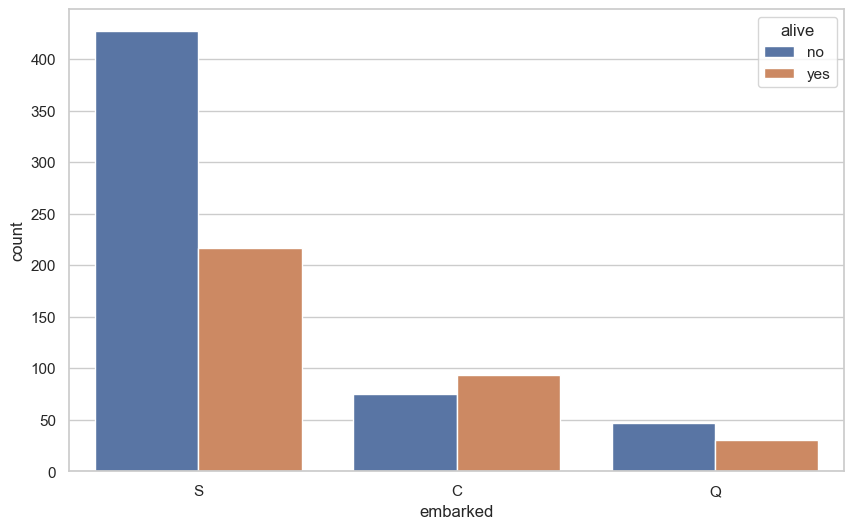

In [133]:
# gráficamente lo podemos ver de la siguiente manera:
plt.figure(figsize = (10,6))
sns.countplot( data = df_titanic, x = "embarked", hue = "alive")

* A simple vista parece que el puerto tiene influencia en la supervivencia hay que tener en cuenta un detalle importante: es posible que la clase del billete influya más que el puerto de embarque. Vamos a comprobarlo.


In [137]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'grupo_clase'],
      dtype='object')

<Axes: xlabel='pclass', ylabel='count'>

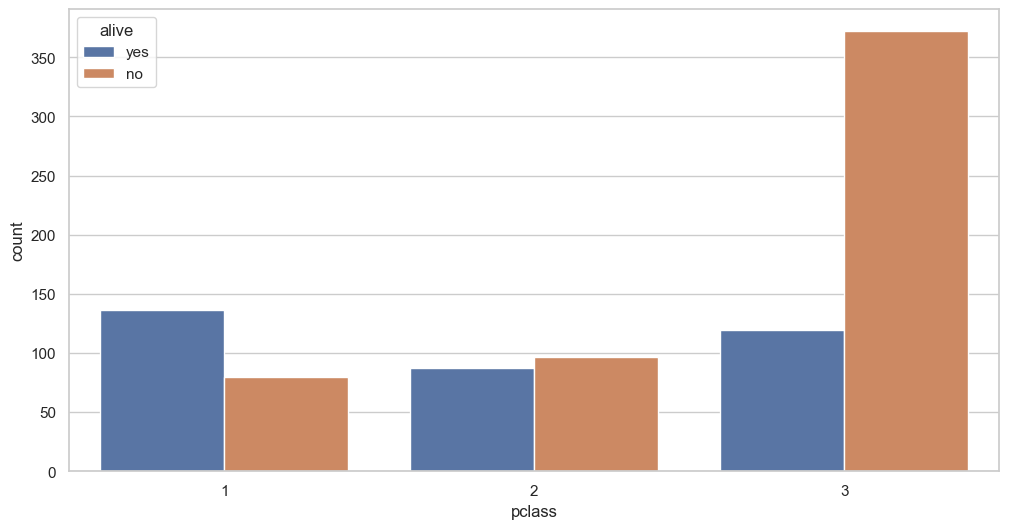

In [136]:
# Influencia de la clase en la superviviencia según el puerto de embarque.
df_titanic.groupby(["embarked", "pclass"])["alive"].value_counts(normalize=True) * 100

# gráficamente lo podemos ver de la sifuiente manera:
plt.figure(figsize = (12,6))
sns.countplot ( data = df_titanic, x = "pclass", hue="alive")

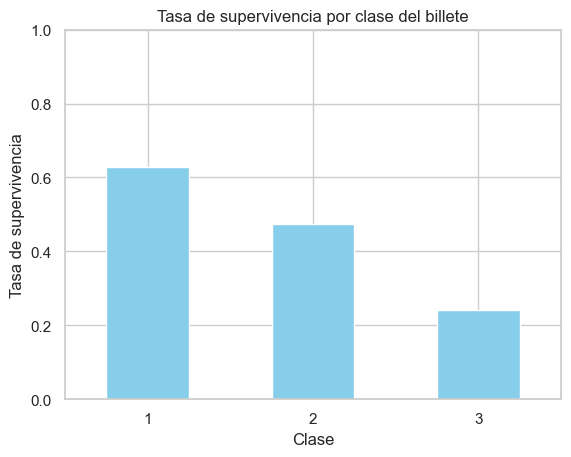

In [138]:
df_titanic.groupby("pclass")["survived"].mean().plot(kind="bar", color="skyblue")
plt.title("Tasa de supervivencia por clase del billete")
plt.ylabel("Tasa de supervivencia")
plt.xlabel("Clase")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


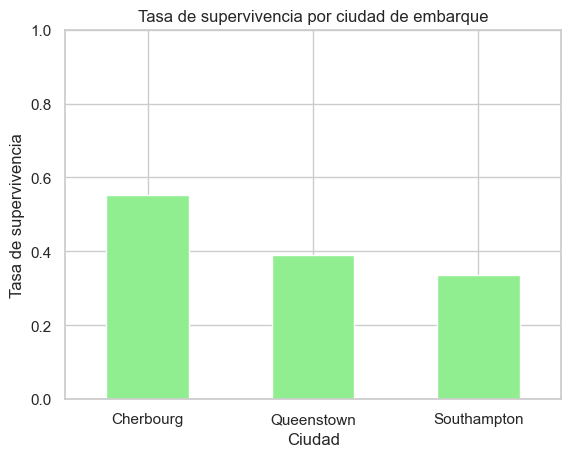

In [139]:
df_titanic.groupby("embark_town")["survived"].mean().plot(kind="bar", color="lightgreen")
plt.title("Tasa de supervivencia por ciudad de embarque")
plt.ylabel("Tasa de supervivencia")
plt.xlabel("Ciudad")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


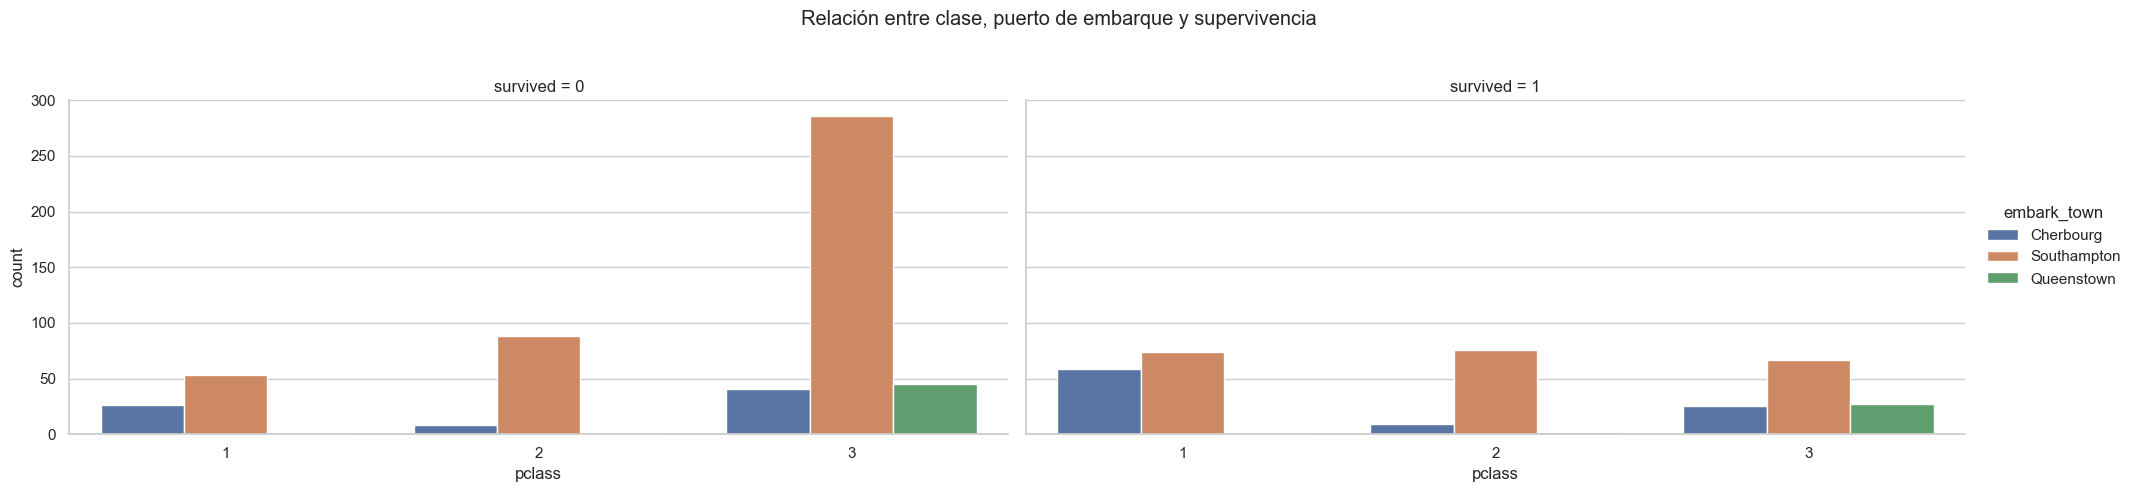

In [141]:
import seaborn as sns

sns.catplot(
    data=df_titanic,
    x="pclass",
    hue="embark_town",
    col="survived",
    kind="count",
    height=5,
    aspect=2
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Relación entre clase, puerto de embarque y supervivencia")
plt.show()


* Los puertos por lo que vemos no tienen una influencia significativa en la superviviencia a simple vista. Las tasas de supervivencia se mantienen similares en todos los puertos de embarque, en el puerto de Southampton hay más fallecidos es porque embarcaron más personas pertenecientes a la tercera clase. Como hemos visto anteriormente, la tercera clase tenía una tasa de mortalidad notablemente más alta que las otras clases.